## Capstone: Nearest Document Search

### Project on News Data: Searching Similar News for each category of news, Word Cloud for each category of news, Text Summarization for each category of news and Sentiment Analysis for each news from news corpus

In [1]:
# Importing libraries
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.neighbors import NearestNeighbors
from nltk.corpus import stopwords
from sklearn.neighbors import KDTree
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import sumy
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lex_rank import LexRankSummarizer

In [2]:
# Loading the data set from respective category folders
path='G:\\Analytics_Praxis\\Capstone\\NewData'
x={}
for i in os.listdir(path):
    new_path=path+'/'+i
    for j in os.listdir(new_path):    
        f=open(new_path+'/'+j,'r')
        data=f.read()
        x[i+'_'+j.split('.')[0]]=" ".join(data.split('\n'))
        f.close()
data_frame=pd.DataFrame(columns=['Topics','News'])
data_frame['Topics']=x.keys()
data_frame['News']=x.values()

In [3]:
# creating a function for stopwords
from nltk.corpus import stopwords
# extracting the stopwords from nltk library
sw = set(stopwords.words('english'))
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [4]:
# function for lemmatization
def stem_sentences(sentence):
    lemmatizer=WordNetLemmatizer()
    tokens = sentence.split()
    lemma_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemma_tokens)

In [5]:
# Function for searching 3 nearest neighbour of a user defind news from business news dataframe
def knnbusinessnews(x):
    # removing the punctuations
    data_frame['News2'] = data_frame['News'].str.replace('[^\w\s]','')
    # removing the digits
    data_frame['News2'] = data_frame['News2'].str.replace('\d+', '')
    #sw = set(stopwords.words('english'))
        # Applying the stopwords funtion to the news data
    data_frame["News3"] = data_frame["News2"].apply(stopwords)
    data_frame['News4'] = data_frame['News3'].apply(stem_sentences)
    # count vectorizer of the news
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(data_frame["News4"])
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    data_frame['tfidf']=list(X_train_tfidf.toarray())
    Business_data_frame=data_frame[data_frame.Topics.str.contains("Business")]
    Business_data_frame.reset_index(drop=True, inplace=True)
    model1=NearestNeighbors(metric='cosine', algorithm='brute')
    model1.fit(Business_data_frame['tfidf'].tolist())
    businesslist=[]
    distances,indices1 = model1.kneighbors(Business_data_frame["tfidf"][Business_data_frame['Topics']==x].tolist(),n_neighbors=3)
    businesslist.append(indices1)
    return(businesslist)
    

In [16]:
# calling the function to find the nearest neighbour to 5th news in business dataframe
knnbusinessnews("Business_5")

[array([[5, 2, 6]], dtype=int64)]

In [8]:
# Function for searching 3 nearest neighbour of a user defind news from entertainmnet news dataframe
def knnEntertainmentnews(x):
    # removing the punctuations
    data_frame['News2'] = data_frame['News'].str.replace('[^\w\s]','')
    # removing the digits
    data_frame['News2'] = data_frame['News2'].str.replace('\d+', '')
    #sw = set(stopwords.words('english'))
        # Applying the stopwords funtion to the news data
    data_frame["News3"] = data_frame["News2"].apply(stopwords)
    data_frame['News4'] = data_frame['News3'].apply(stem_sentences)
    # count vectorizer of the news
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(data_frame["News4"])
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    data_frame['tfidf']=list(X_train_tfidf.toarray())
    Entertainment_data_frame=data_frame[data_frame.Topics.str.contains("Entertainment")]
    Entertainment_data_frame.reset_index(drop=True, inplace=True)
    model2=NearestNeighbors(metric='cosine', algorithm='brute')
    model2.fit(Entertainment_data_frame['tfidf'].tolist())
    entertainmentlist=[]
    distances,indices2 = model2.kneighbors(Entertainment_data_frame["tfidf"][Entertainment_data_frame['Topics']==x].tolist(),n_neighbors=3)
    entertainmentlist.append(indices2)
    return(entertainmentlist)
    

In [17]:
# calling the function to find the nearest neighbour to 7th news in entertainmnet dataframe
knnEntertainmentnews("Entertainment_7")

[array([[16,  1,  0]], dtype=int64)]

In [10]:
# Function for searching 3 nearest neighbour of a user defind news from politics news dataframe
def knnPoliticsnews(x):
    # removing the punctuations
    data_frame['News2'] = data_frame['News'].str.replace('[^\w\s]','')
    # removing the digits
    data_frame['News2'] = data_frame['News2'].str.replace('\d+', '')
    #sw = set(stopwords.words('english'))
        # Applying the stopwords funtion to the news data
    data_frame["News3"] = data_frame["News2"].apply(stopwords)
    data_frame['News4'] = data_frame['News3'].apply(stem_sentences)
    # count vectorizer of the news
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(data_frame["News4"])
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    data_frame['tfidf']=list(X_train_tfidf.toarray())
    Politics_data_frame=data_frame[data_frame.Topics.str.contains("Politics")]
    Politics_data_frame.reset_index(drop=True, inplace=True)
    model3=NearestNeighbors(metric='cosine', algorithm='brute')
    model3.fit(Politics_data_frame['tfidf'].tolist())
    politicslist=[]
    distances,indices3 = model3.kneighbors(Politics_data_frame["tfidf"][Politics_data_frame['Topics']==x].tolist(),n_neighbors=3)
    politicslist.append(indices3)
    return(politicslist)
    

In [18]:
# calling the function to find the nearest neighbour to 2nd news in politics dataframe
knnPoliticsnews("Politics_2")

[array([[2, 6, 8]], dtype=int64)]

In [12]:
# Function for searching 3 nearest neighbour of a user defind news from science news dataframe
def knnSciencenews(x):
    # removing the punctuations
    data_frame['News2'] = data_frame['News'].str.replace('[^\w\s]','')
    # removing the digits
    data_frame['News2'] = data_frame['News2'].str.replace('\d+', '')
    #sw = set(stopwords.words('english'))
        # Applying the stopwords funtion to the news data
    data_frame["News3"] = data_frame["News2"].apply(stopwords)
    data_frame['News4'] = data_frame['News3'].apply(stem_sentences)
    # count vectorizer of the news
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(data_frame["News4"])
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    data_frame['tfidf']=list(X_train_tfidf.toarray())
    Science_data_frame=data_frame[data_frame.Topics.str.contains("Science")]
    Science_data_frame.reset_index(drop=True, inplace=True)
    model4=NearestNeighbors(metric='cosine', algorithm='brute')
    model4.fit(Science_data_frame['tfidf'].tolist())
    sicencelist=[]
    distances,indices4 = model4.kneighbors(Science_data_frame["tfidf"][Science_data_frame['Topics']==x].tolist(),n_neighbors=3)
    sicencelist.append(indices4)
    return(sicencelist)

In [19]:
# calling the function to find the nearest neighbour to 8th news in science dataframe
knnSciencenews('Science_8')

[array([[8, 1, 2]], dtype=int64)]

In [14]:
# Function for searching 3 nearest neighbour of a user defind news from sports news dataframe
def knnSportsnews(x):
    # removing the punctuations
    data_frame['News2'] = data_frame['News'].str.replace('[^\w\s]','')
    # removing the digits
    data_frame['News2'] = data_frame['News2'].str.replace('\d+', '')
    #sw = set(stopwords.words('english'))
        # Applying the stopwords funtion to the news data
    data_frame["News3"] = data_frame["News2"].apply(stopwords)
    data_frame['News4'] = data_frame['News3'].apply(stem_sentences)
    # count vectorizer of the news
    count_vect = CountVectorizer()
    X_train_counts = count_vect.fit_transform(data_frame["News4"])
    tfidf_transformer = TfidfTransformer()
    X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
    data_frame['tfidf']=list(X_train_tfidf.toarray())
    Sports_data_frame=data_frame[data_frame.Topics.str.contains("Sports")]
    Sports_data_frame.reset_index(drop=True, inplace=True)
    model5=NearestNeighbors(metric='cosine', algorithm='brute')
    model5.fit(Sports_data_frame['tfidf'].tolist())
    sportslist=[]
    distances,indices5 = model5.kneighbors(Sports_data_frame["tfidf"][Sports_data_frame['Topics']==x].tolist(),n_neighbors=3)
    sportslist.append(indices5)
    return(sportslist)

In [20]:
# calling the function to find the nearest neighbour to 18th news in sports dataframe
knnSportsnews("Sports_18")

[array([[ 9,  3, 17]], dtype=int64)]

## WORDCLOUD

In [23]:
# generating wordcloud for business category data frame
def wcbusiness():
    Business_data_frame=data_frame[data_frame.Topics.str.contains("Business")]
    Business_data_frame.reset_index(drop=True, inplace=True)
    for i in range(0,len(Business_data_frame)):
        text = Business_data_frame.News[i]
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #wordcloud.to_file("G://Analytics_Praxis//Capstone//Images_WordCloud//All_Images//Sonnet{0}.png".format(i))

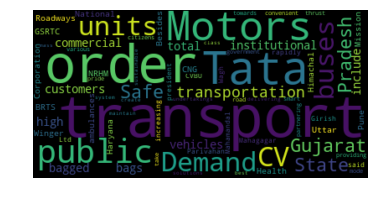

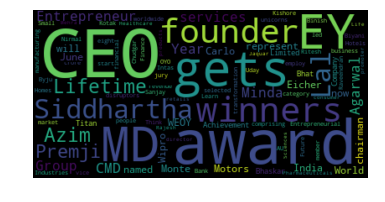

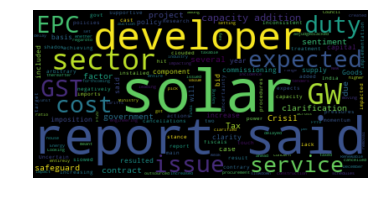

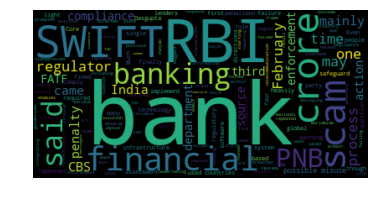

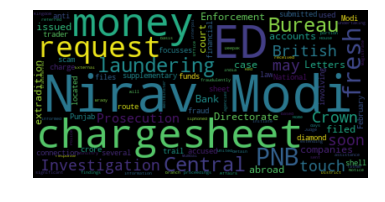

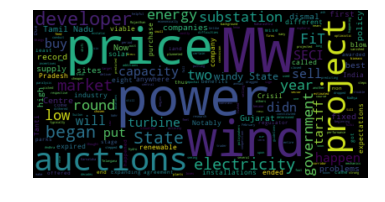

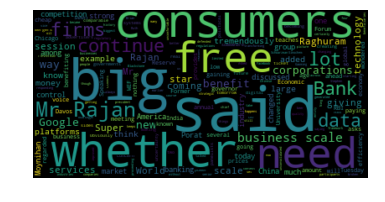

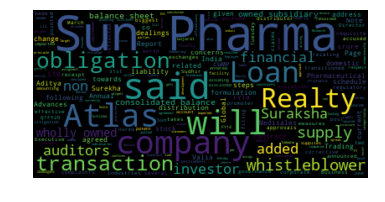

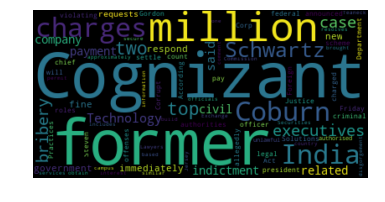

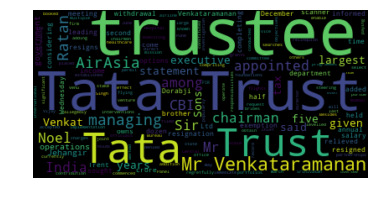

In [24]:
wcbusiness()

In [25]:
# generating wordcloud for entertainment category dataframe
def wcentertainment():
    Entertainment_data_frame=data_frame[data_frame.Topics.str.contains("Entertainment")]
    Entertainment_data_frame.reset_index(drop=True, inplace=True)
    for i in range(0,len(Entertainment_data_frame)):
        text = Entertainment_data_frame.News[i]
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #wordcloud.to_file("G://Analytics_Praxis//Capstone//Images_WordCloud//All_Images//Sonnet{0}.png".format(i))for i in range(0,len(data_frame)):

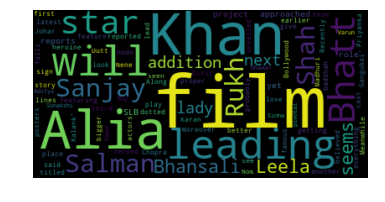

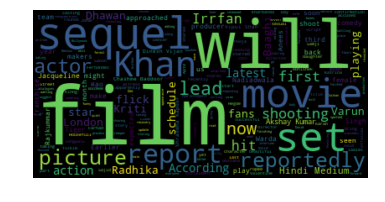

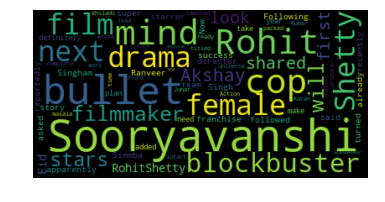

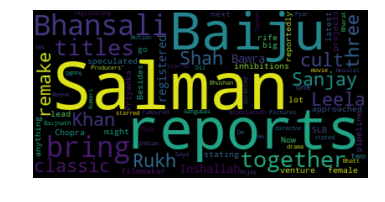

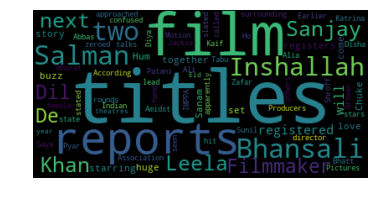

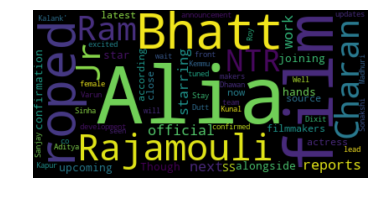

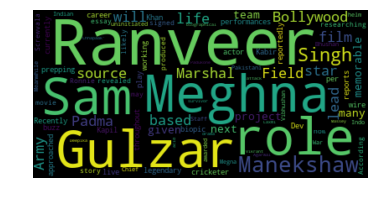

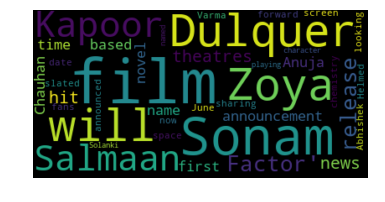

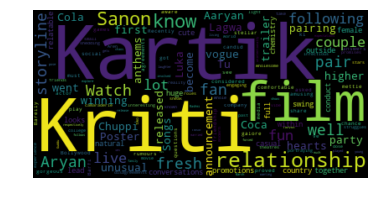

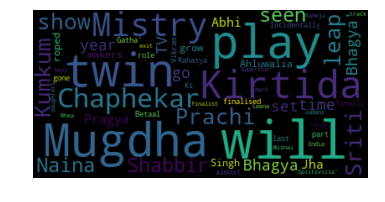

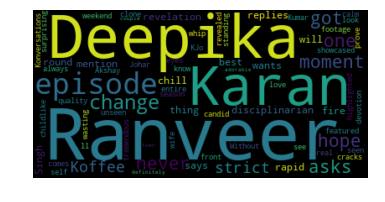

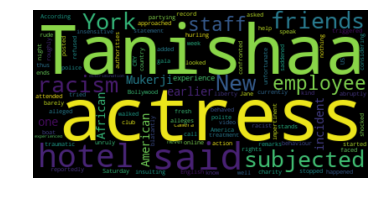

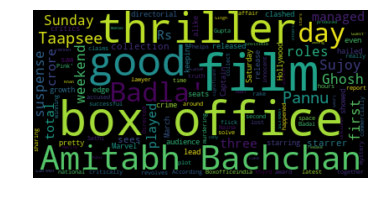

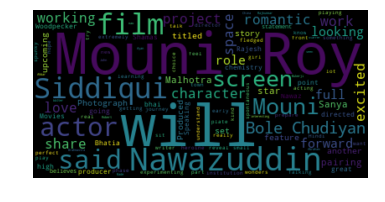

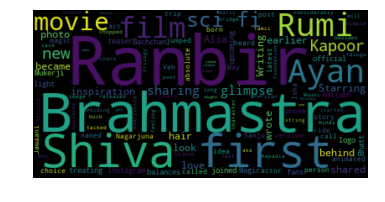

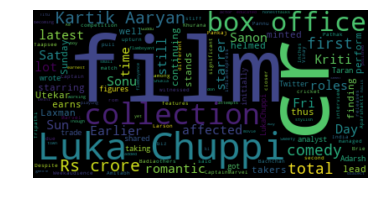

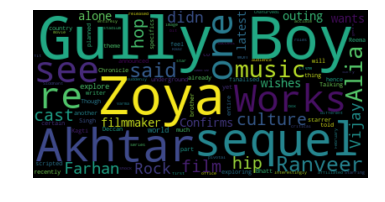

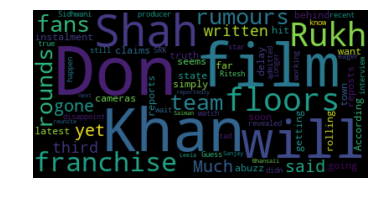

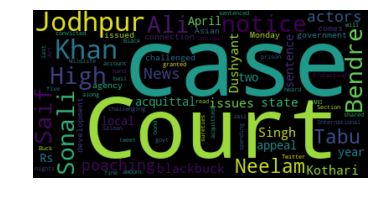

In [26]:
wcentertainment()

In [27]:
# generating wordcloud for politcs category dataframe
def wcpolitics():
    Politics_data_frame=data_frame[data_frame.Topics.str.contains("Politics")]
    Politics_data_frame.reset_index(drop=True, inplace=True)
    for i in range(0,len(Politics_data_frame)):
        text = Politics_data_frame.News[i]
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #wordcloud.to_file("G://Analytics_Praxis//Capstone//Images_WordCloud//All_Images//Sonnet{0}.png".format(i))

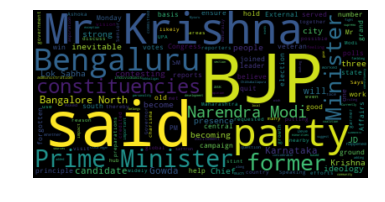

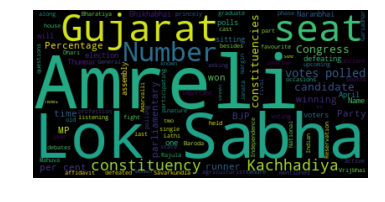

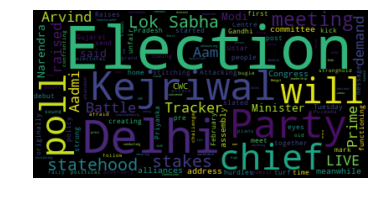

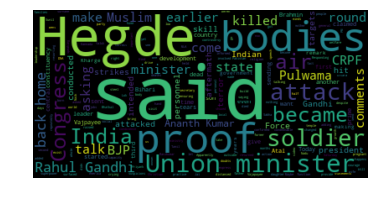

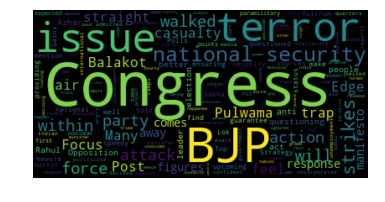

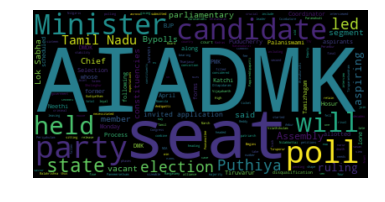

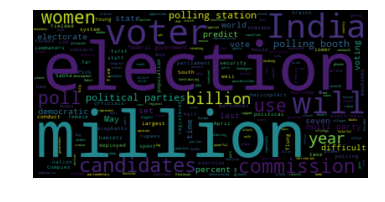

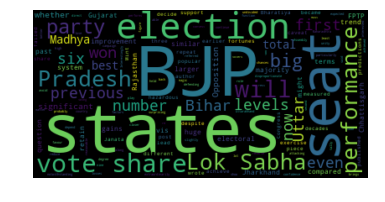

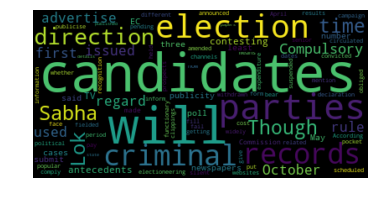

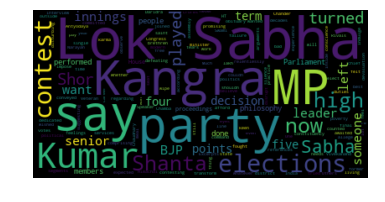

In [28]:
wcpolitics()

In [29]:
# generating wordcloud for science category dataframe
def wcscience():
    Science_data_frame=data_frame[data_frame.Topics.str.contains("Science")]
    Science_data_frame.reset_index(drop=True, inplace=True)
    for i in range(0,len(Science_data_frame)):
        text = Science_data_frame.News[i]
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #wordcloud.to_file("G://Analytics_Praxis//Capstone//Images_WordCloud//All_Images//Sonnet{0}.png".format(i))

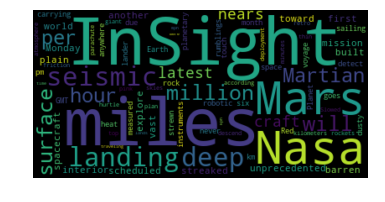

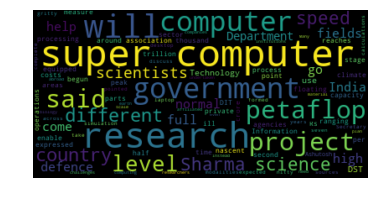

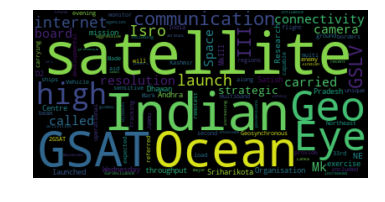

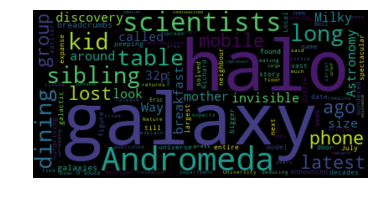

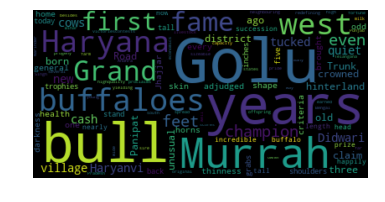

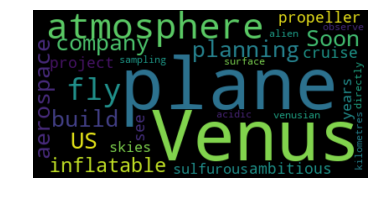

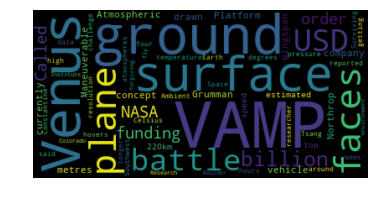

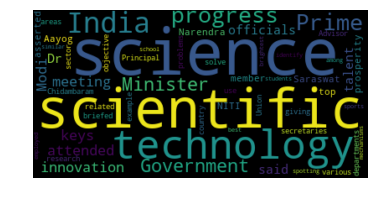

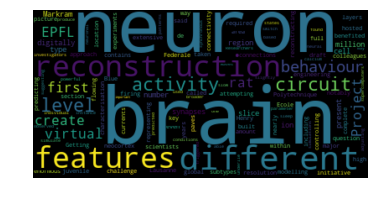

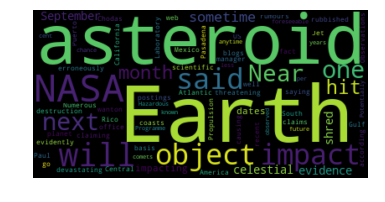

In [30]:
wcscience()

In [31]:
# generating wordcloud for sports category dataframe
def wcsports():
    Sports_data_frame=data_frame[data_frame.Topics.str.contains("Sports")]
    Sports_data_frame.reset_index(drop=True, inplace=True)
    for i in range(0,len(Sports_data_frame)):
        text = Sports_data_frame.News[i]
        wordcloud = WordCloud().generate(text)
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        #wordcloud.to_file("G://Analytics_Praxis//Capstone//Images_WordCloud//All_Images//Sonnet{0}.png".format(i))

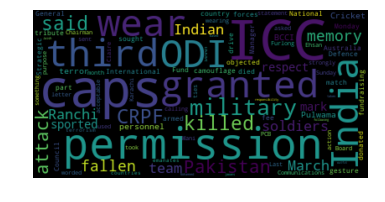

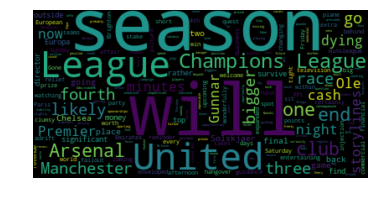

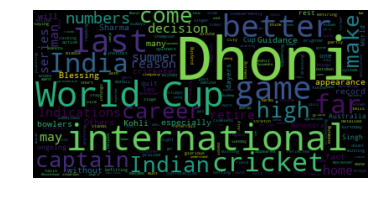

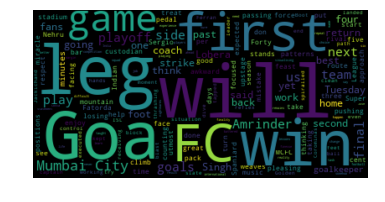

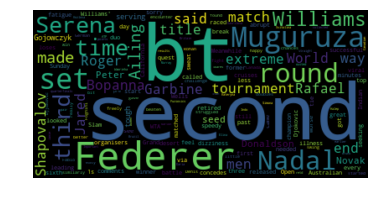

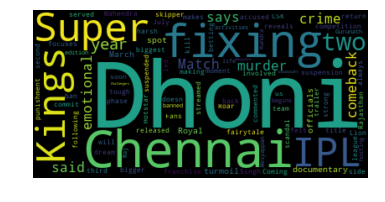

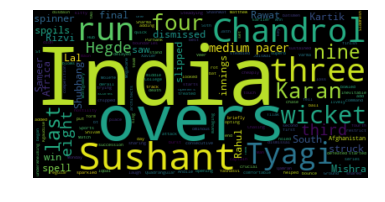

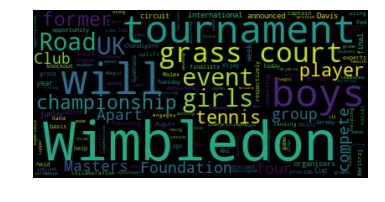

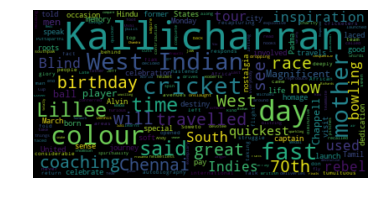

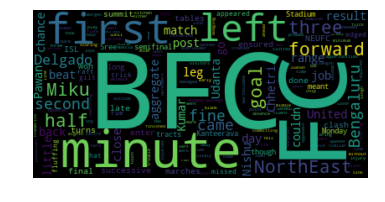

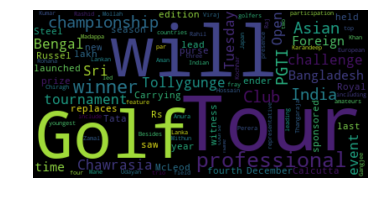

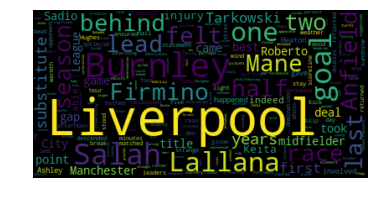

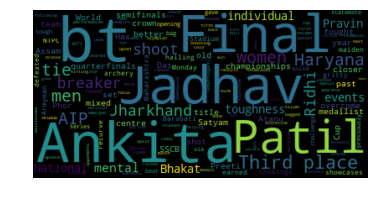

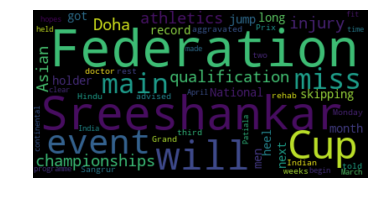

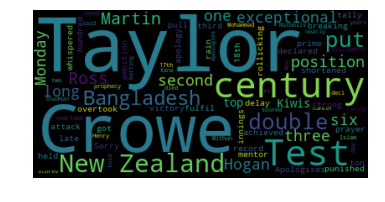

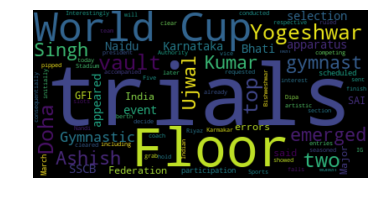

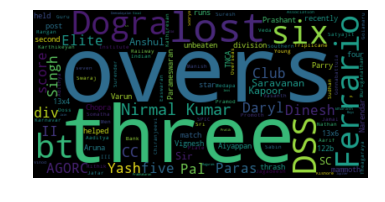

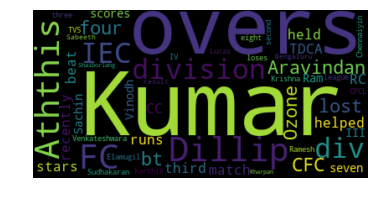

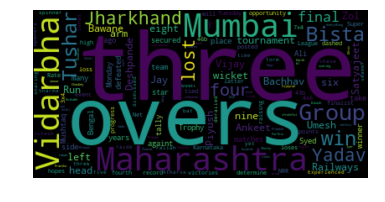

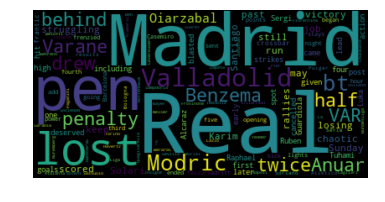

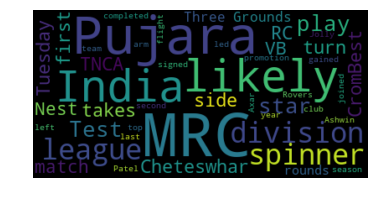

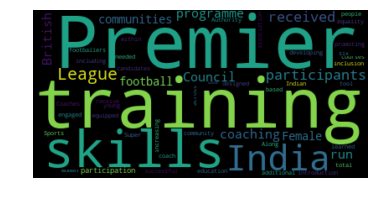

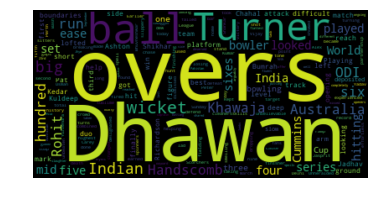

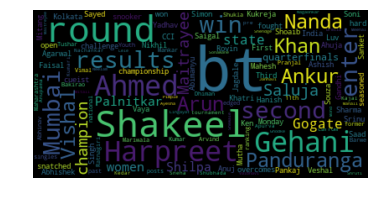

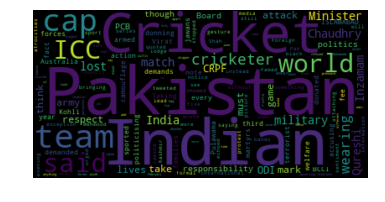

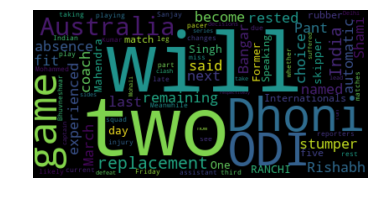

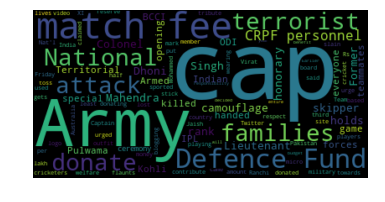

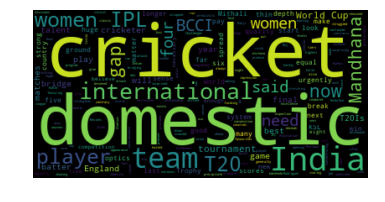

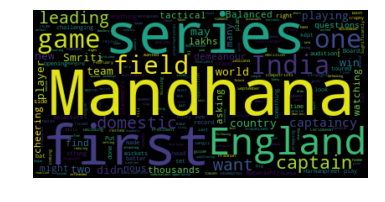

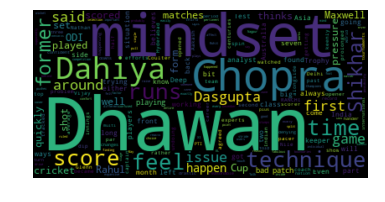

In [32]:
wcsports()

## Text Summarization

In [33]:
# Business data sumarization
def Business(i):
    Business_data_frame=data_frame[data_frame.Topics.str.contains("Business")]
    Business_data_frame.reset_index(drop=True, inplace=True)
    parser = PlaintextParser.from_string(Business_data_frame["News"][i],Tokenizer("english"))
    # Using LexRank
    summarizer = LexRankSummarizer()
    #Summarize the document with 2 sentences
    summary = summarizer(parser.document, 2)
    for sentence in summary:
        print(sentence)

In [34]:
# Calling business function to extract the summary of 2nd news from dataframe
Business(2)

“However, developer sentiment has been negatively impacted by the lack of clarity on several policy issues and arbitrary bid cancellations, which is contrary to a supportive policy stance from the government.”  India’s solar sector installed capacity is expected to touch 60 GW by 2022 and 70 GW by 2023.
“The issue lacked clarity for over a year, until the GST Council in December 2018 clarified with regardto EPC contracts by setting a ratio of 70:30 of the entire value of the EPC contract, where 70% will be taxed at 5%, and 30% at 18%, to factor in both the supply and service component.”  However, this clarification has meant an increased tax incidence, of about 8-9%, which is higher than the 5% expected by the industry, leading to an increase in final capital costs.


In [35]:
# Entertainment data sumarization
def Entertainment(i):
    Entertainment_data_frame=data_frame[data_frame.Topics.str.contains("Entertainment")]
    Entertainment_data_frame.reset_index(drop=True, inplace=True)
    parser = PlaintextParser.from_string(Entertainment_data_frame["News"][i],Tokenizer("english"))
    # Using LexRank
    summarizer = LexRankSummarizer()
    #Summarize the document with 2 sentences
    summary = summarizer(parser.document, 2)
    for sentence in summary:
        print(sentence)

In [36]:
# Calling Entertainment function to extract the summary of 8 news from dataframe
Entertainment(8)

Recently, we got a chance to play candid games with Kartik Aryan and Kriti Sanon to see how well do they know each other.
And while this is only a small sneak into their camaraderie, watch their film in the theatres near you to get a wholesome dose of it.


In [37]:
# Politics data sumarization
def Politics(i):
    Politics_data_frame=data_frame[data_frame.Topics.str.contains("Politics")]
    Politics_data_frame.reset_index(drop=True, inplace=True)
    parser = PlaintextParser.from_string(Politics_data_frame["News"][i],Tokenizer("english"))
    # Using LexRank
    summarizer = LexRankSummarizer()
    #Summarize the document with 2 sentences
    summary = summarizer(parser.document, 2)
    for sentence in summary:
        print(sentence)

In [38]:
# Calling Politics function to extract the summary of 9th news from dataframe
Politics(9)

‘Lok Sabha has turned into Shor Sabha’, says Kangra MP?Shanta Kumar Lok Sabha Elections 2019: Kangra MP Shanta Kumar says he has played his innings and now want someone else to contest from the seat.
What do you have to say?


In [39]:
# Science data sumarization
def Science(i):
    Science_data_frame=data_frame[data_frame.Topics.str.contains("Science")]
    Science_data_frame.reset_index(drop=True, inplace=True)
    parser = PlaintextParser.from_string(Science_data_frame["News"][i],Tokenizer("english"))
    # Using LexRank
    summarizer = LexRankSummarizer()
    #Summarize the document with 2 sentences
    summary = summarizer(parser.document, 2)
    for sentence in summary:
        print(sentence)

In [40]:
# Calling Science function to extract the summary of 3rd news from dataframe
Science(3)

M 32 is not latest mobile phone but our galaxy sibling lost long ago  n July 23, a group of scientists announced a spectacular discovery.
Here the kid is Andromeda, also called M 31, and the breakfast was M 32.


In [41]:
# Sports data sumarization
def Sports(i):
    Sports_data_frame=data_frame[data_frame.Topics.str.contains("Sports")]
    Sports_data_frame.reset_index(drop=True, inplace=True)
    parser = PlaintextParser.from_string(Sports_data_frame["News"][i],Tokenizer("english"))
    # Using LexRank
    summarizer = LexRankSummarizer()
    #Summarize the document with 2 sentences
    summary = summarizer(parser.document, 2)
    for sentence in summary:
        print(sentence)

In [42]:
# Calling Sports function to extract the summary of 6th news from dataframe
Sports(6)

India-B has the last laugh  Chandrol, Sushant and Karan the main architects of the team’s wnn Medium pacer Sushant Mishra’s opening burst with the new ball set up a comfortable 72-run win for India-B over India-A in the final of the Quadrangular under-19 one-day series at the Sports Hub here on Monday.
The scores:  Final: India-B 232 for nine in 50 overs (Rahul Chandrol 70, Sameer Rizvi 67, Kartik Tyagi three for 33) bt India-A 160 in 38.3 overs (Shubhang Hegde 42, Sushant Mishra four for 41, Karan Lal three for 25).


## Sentiment Analysis

In [43]:
# function for sentiment analysis check for each news
def sentiment():
    # initializig object for sentimnetAnalyzer
    analyser = SentimentIntensityAnalyzer()
    for i in data_frame.News4:    
        sent=(analyser.polarity_scores(i))
        li=[]
        lv=[]
        li=list(sent.keys())
        lv=list(sent.values())
        ly=[]
        for i in lv:
            print(i*100)
            ly.append(i*100)
        ly
        lif=[]
        lif=li[:3]
        #print(lif)
        liv=[]
        liv=ly[:3]
        #print(liv)
        #plt.bar(li,ly)
        #plt.show()
        liff=['Depressing','Neutral ','Pleasant']
        colors = ['red', 'gold', 'green']
        explode = (0, 0, 0)  # explode a slice if required

        plt.pie(liv, explode=explode, labels=liff, colors=colors,
                autopct='%1.1f%%', shadow=True)

        #draw a circle at the center of pie to make it look like a donut
        centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)


        # Set aspect ratio to be equal so that pie is drawn as a circle.
        plt.axis('equal')
        plt.show() 

2.9000000000000004
82.5
14.7
90.62


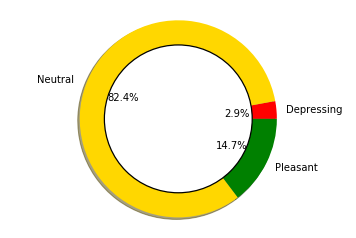

1.3
78.9
19.8
98.18


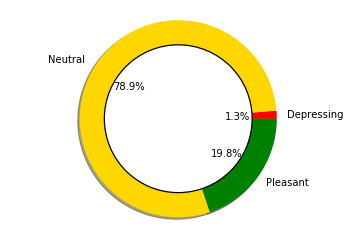

5.7
81.6
12.7
95.09


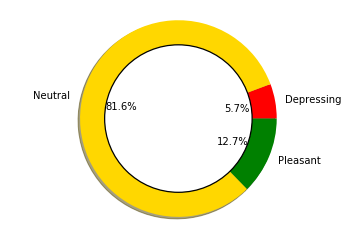

16.7
74.1
9.2
-99.03


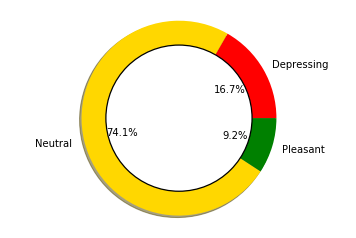

11.4
81.6
7.000000000000001
-85.19


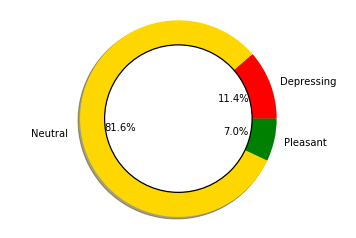

11.200000000000001
74.0
14.899999999999999
97.53


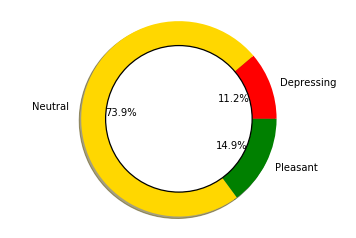

3.3000000000000003
78.4
18.3
99.46000000000001


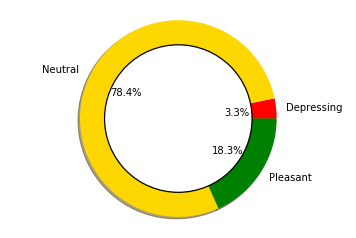

6.3
83.6
10.100000000000001
94.28999999999999


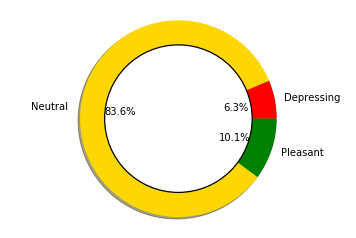

8.799999999999999
72.2
19.0
87.5


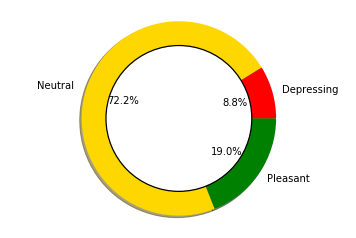

4.3
64.0
31.7
99.77000000000001


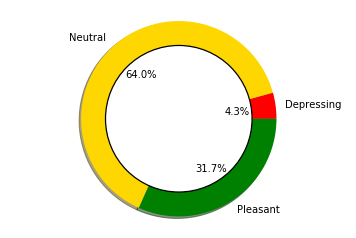

0.0
90.7
9.3
92.17


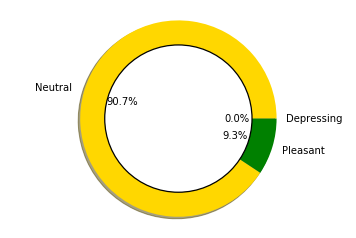

5.0
79.10000000000001
15.9
99.76


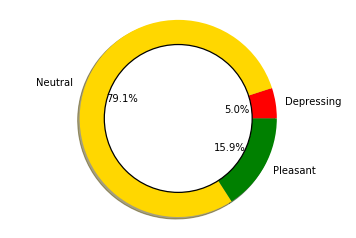

0.0
76.8
23.200000000000003
97.81


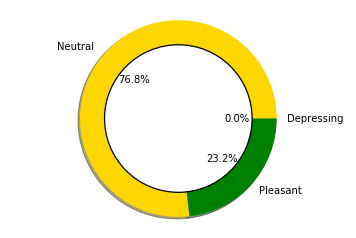

2.3
97.7
0.0
-36.120000000000005


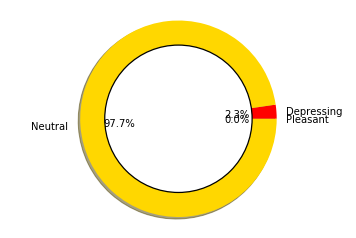

2.1
89.3
8.7
81.26


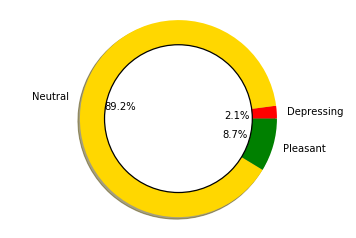

0.0
90.60000000000001
9.4
77.17


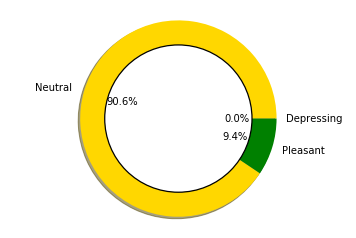

5.800000000000001
88.0
6.2
-10.27


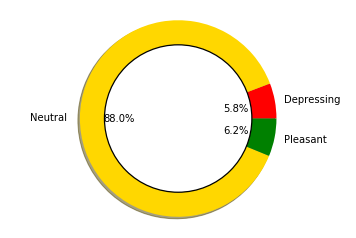

0.0
84.7
15.299999999999999
80.2


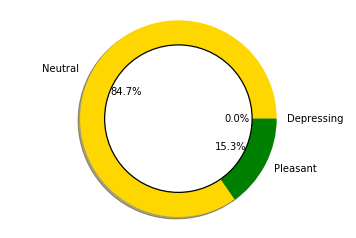

5.6000000000000005
61.8
32.6
99.57000000000001


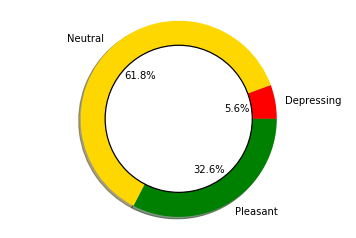

0.0
90.9
9.1
73.50999999999999


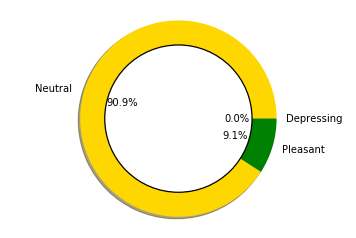

2.8000000000000003
72.2
25.0
98.5


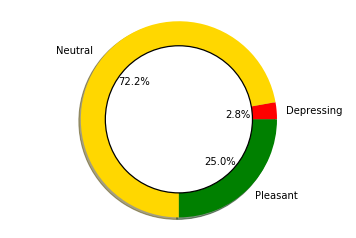

24.9
59.4
15.6
-95.7


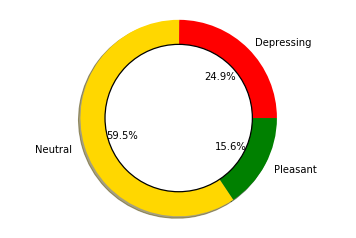

6.1
67.60000000000001
26.3
98.48


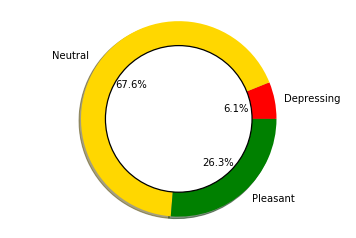

0.0
74.3
25.7
99.3


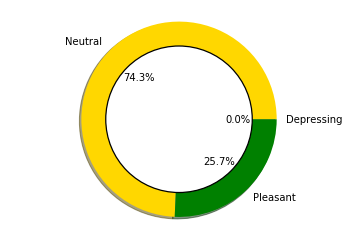

1.7000000000000002
83.1
15.299999999999999
97.81


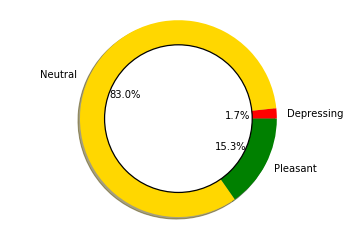

1.5
83.3
15.2
97.64


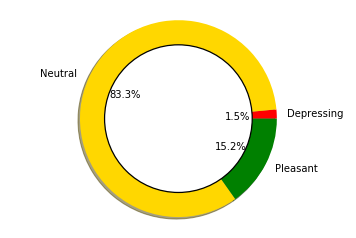

9.0
85.39999999999999
5.5
-43.44


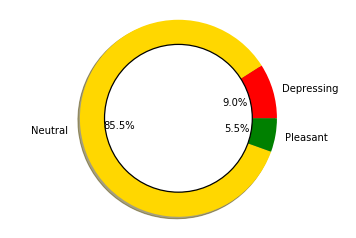

5.6000000000000005
77.9
16.6
78.45


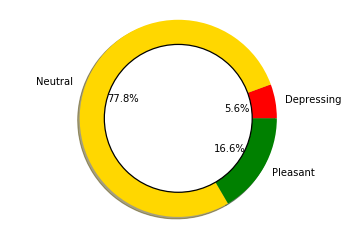

4.3
82.5
13.200000000000001
83.16


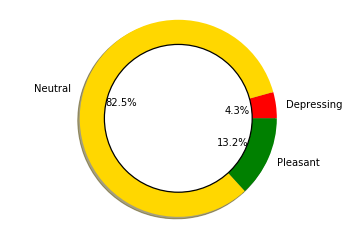

1.7000000000000002
75.1
23.200000000000003
99.72


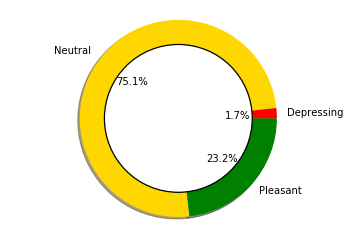

4.9
81.3
13.8
92.86999999999999


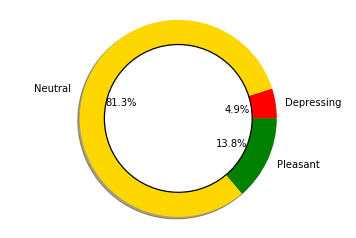

12.2
75.3
12.4
10.27


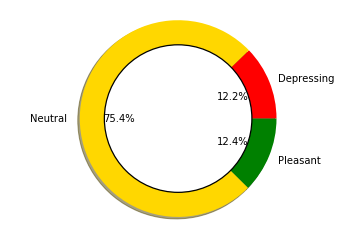

16.7
78.0
5.3
-99.46000000000001


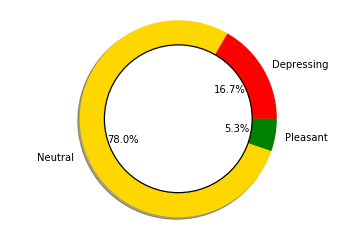

18.3
60.3
21.4
68.7


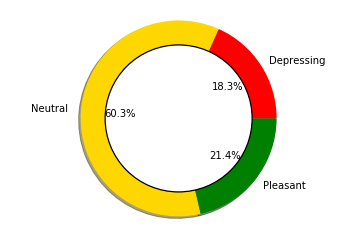

4.5
86.0
9.4
91.86


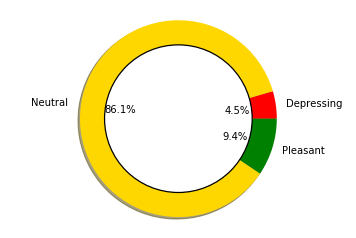

6.4
79.9
13.700000000000001
98.83


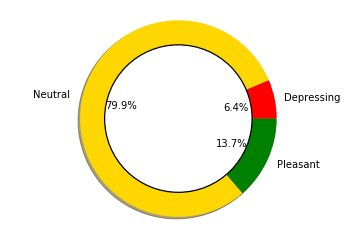

3.8
67.60000000000001
28.599999999999998
99.72


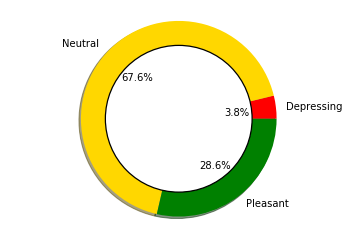

12.3
74.1
13.600000000000001
-20.23


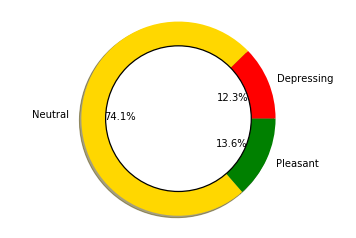

9.9
72.6
17.5
94.93


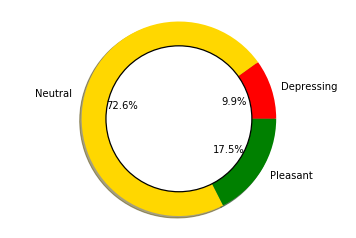

1.4000000000000001
96.8
1.9
12.8


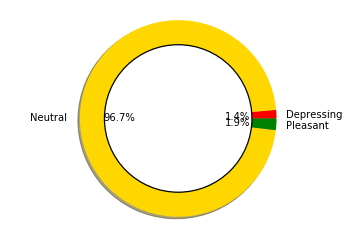

0.0
79.3
20.7
98.81


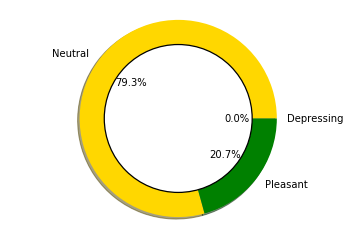

3.6999999999999997
90.3
5.8999999999999995
25.0


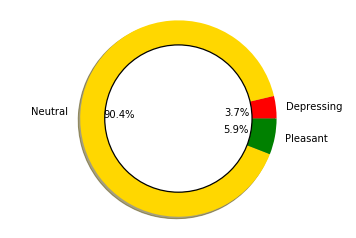

4.0
91.60000000000001
4.3999999999999995
17.44


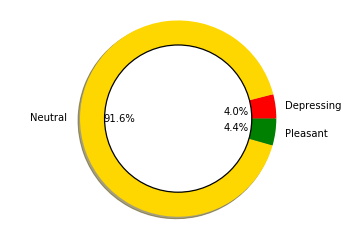

2.9000000000000004
73.3
23.799999999999997
98.31


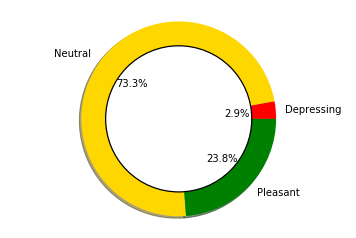

0.0
91.9
8.1
47.67


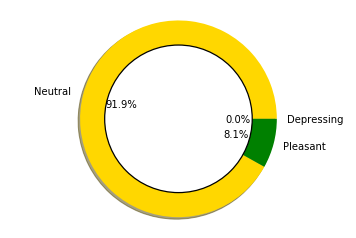

6.1
83.5
10.4
34.0


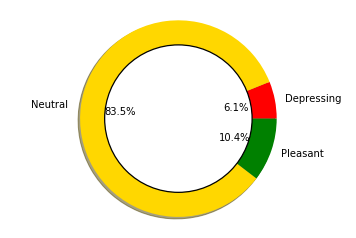

2.6
67.4
29.9
97.74000000000001


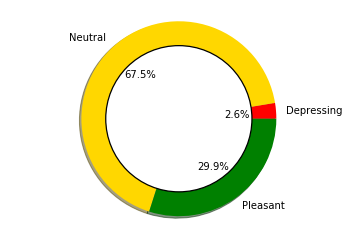

1.4000000000000001
91.5
7.199999999999999
74.3


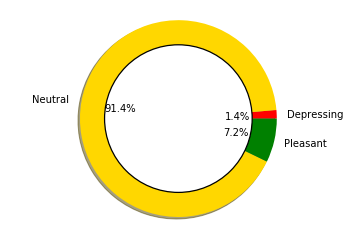

9.1
87.6
3.3000000000000003
-85.19


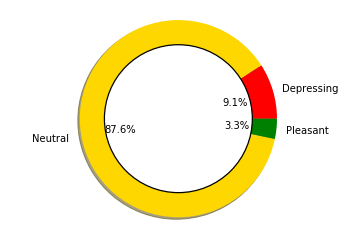

23.9
68.60000000000001
7.6
-98.64


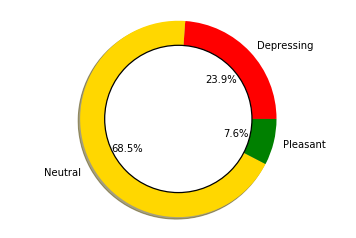

4.8
65.4
29.799999999999997
99.78


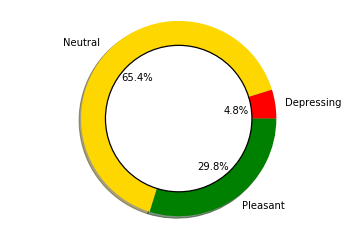

4.6
71.39999999999999
24.0
99.69


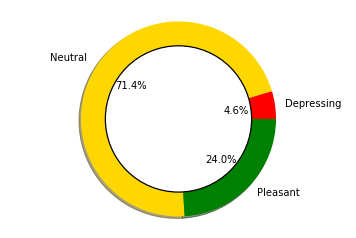

4.9
67.4
27.700000000000003
99.7


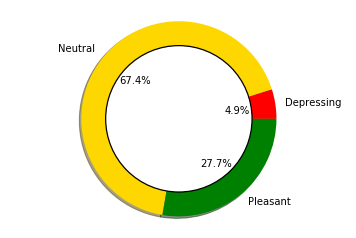

10.6
71.7
17.7
96.65


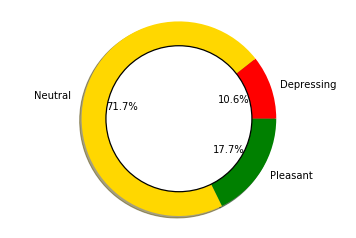

28.199999999999996
55.7
16.1
-96.77


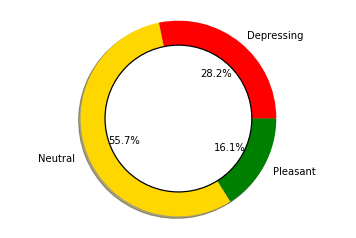

12.5
77.4
10.100000000000001
-60.83


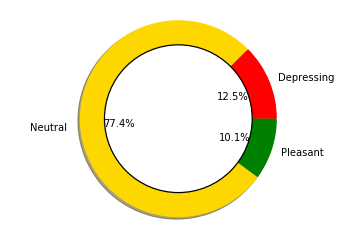

1.3
77.4
21.3
98.95


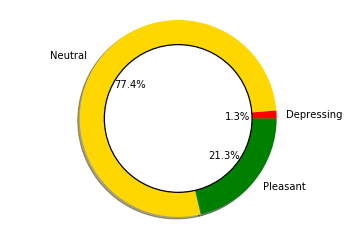

10.299999999999999
71.3
18.4
98.35000000000001


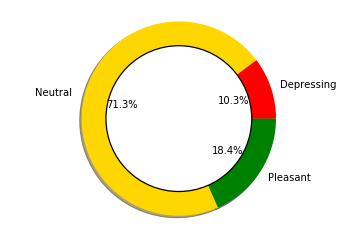

6.800000000000001
78.60000000000001
14.7
96.93


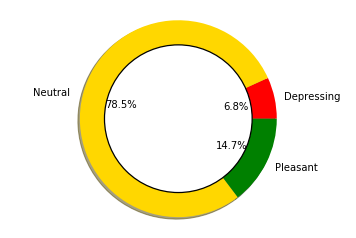

0.0
78.7
21.3
98.36


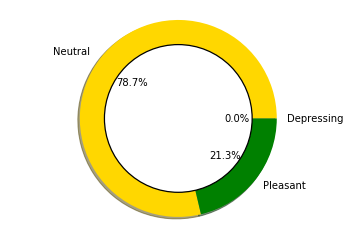

9.1
72.0
18.8
98.89


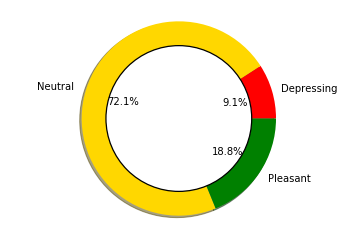

5.800000000000001
82.6
11.600000000000001
95.30999999999999


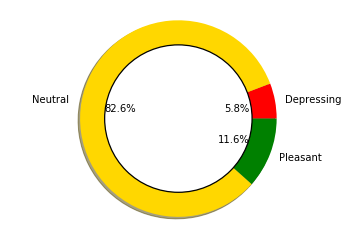

13.200000000000001
67.80000000000001
19.0
72.69


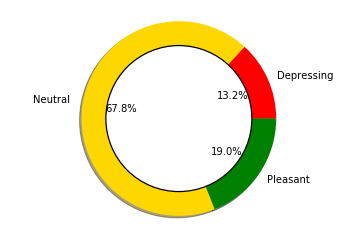

12.8
80.4
6.7
-88.6


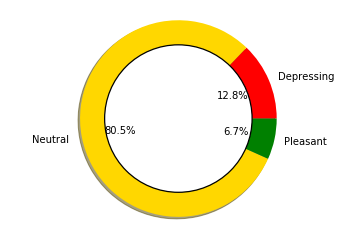

3.4000000000000004
83.5
13.100000000000001
89.1


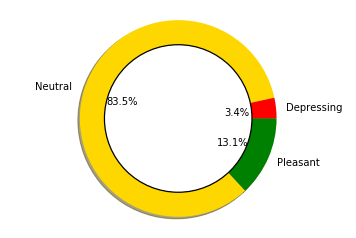

6.1
93.89999999999999
0.0
-85.91


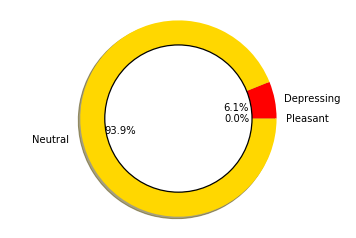

8.7
91.3
0.0
-70.96000000000001


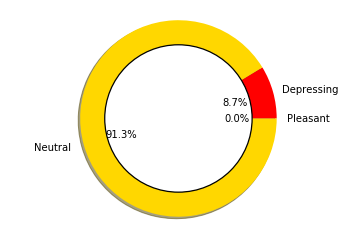

8.4
78.8
12.8
92.46


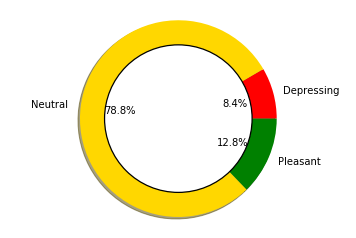

18.8
81.2
0.0
-98.46000000000001


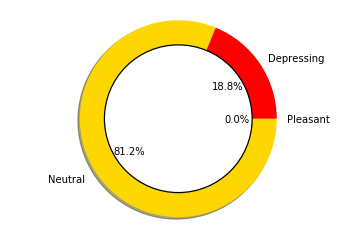

0.0
83.5
16.5
84.42


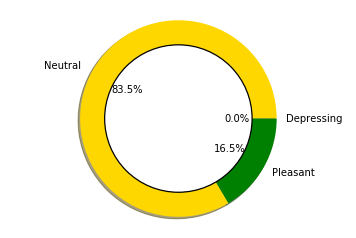

0.0
83.3
16.7
92.17


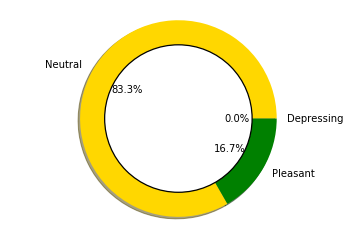

9.1
74.5
16.5
98.42


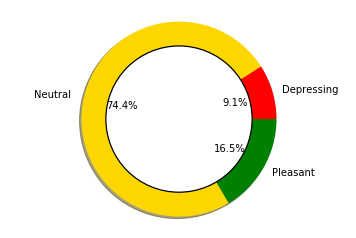

0.0
90.2
9.8
96.17999999999999


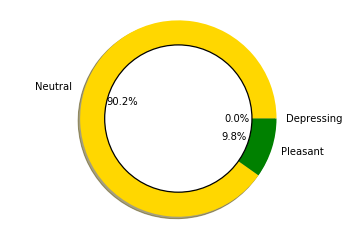

16.8
80.9
2.4
-98.45


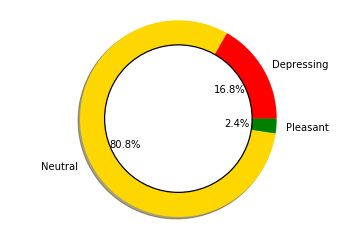

8.0
83.3
8.7
-0.0


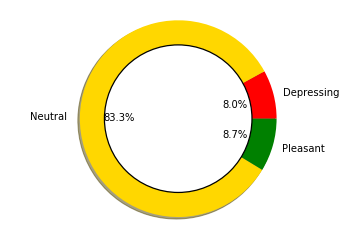

16.7
72.0
11.4
-95.84


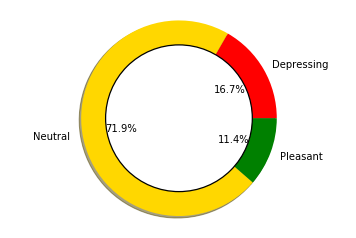

4.7
73.1
22.1
99.72


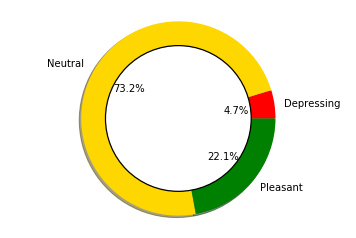

8.9
75.3
15.8
98.36


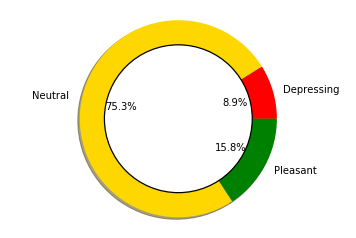

6.1
81.2
12.6
95.8


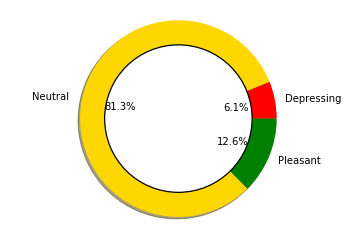

In [44]:
# calling the sentiment function to generate the graphs
sentiment()